Tarea 3 - pregunta 2

¿En qué medida el acceso a computador e internet en el hogar explica las diferencias en el puntaje global de las pruebas Saber 11, una vez considerado el estrato socioeconómico, en Cundinamarca? 

### Limpieza y extracción

In [109]:
#librerias necesarias para exploración y limpieza
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#subir archivo con los datos
df = pd.read_csv("Datos_Cundinamarca.csv")
df.head()

,PERIODO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_GENERO,COLE_JORNADA,COLE_MCPIO_UBICACION,ESTU_FECHANACIMIENTO,ESTU_GENERO,ESTU_PAIS_RESIDE,FAMI_CUARTOSHOGAR,...,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
0,20224,URBANO,N,MIXTO,UNICA,GRANADA,03/09/2004,F,COLOMBIA,Dos,...,No,No,No,A-,42.0,26.0,45.0,42.0,43.0,196.0
1,20224,URBANO,N,MIXTO,SABATINA,CHOACHÍ,10/02/2005,M,COLOMBIA,Tres,...,Si,Si,Si,A-,40.0,60.0,46.0,54.0,50.0,258.0
2,20224,URBANO,NaN,MIXTO,COMPLETA,SOACHA,27/12/2004,M,COLOMBIA,NaN,...,NaN,Si,NaN,A1,54.0,61.0,58.0,55.0,55.0,285.0
3,20224,URBANO,N,MIXTO,COMPLETA,SOACHA,25/06/2006,F,COLOMBIA,Tres,...,Si,Si,Si,A2,62.0,54.0,64.0,63.0,60.0,302.0
4,20224,RURAL,N,MIXTO,SABATINA,SASAIMA,18/05/2006,M,COLOMBIA,Dos,...,No,Si,Si,A1,54.0,45.0,46.0,48.0,52.0,241.0


In [76]:
#valores faltantes en todas las columnas
df.isna().sum()

PERIODO                          0
COLE_AREA_UBICACION            198
COLE_BILINGUE                77355
COLE_GENERO                      0
COLE_JORNADA                     0
COLE_MCPIO_UBICACION             0
ESTU_FECHANACIMIENTO             0
ESTU_GENERO                    265
ESTU_PAIS_RESIDE                 0
FAMI_CUARTOSHOGAR             6558
FAMI_EDUCACIONMADRE          10699
FAMI_EDUCACIONPADRE          10753
FAMI_ESTRATOVIVIENDA         11609
FAMI_PERSONASHOGAR            6620
FAMI_TIENEAUTOMOVIL           6736
FAMI_TIENECOMPUTADOR          7473
FAMI_TIENEINTERNET            9766
FAMI_TIENELAVADORA            6420
DESEMP_INGLES                   71
PUNT_INGLES                     28
PUNT_MATEMATICAS                 0
PUNT_SOCIALES_CIUDADANAS    171841
PUNT_C_NATURALES            171841
PUNT_LECTURA_CRITICA        171841
PUNT_GLOBAL                 171841
dtype: int64

In [77]:
#voy a quedarme solo con las columnas que me sirven para responder mi pregunta 
columnas_interes = [
    "PUNT_GLOBAL",
    "FAMI_TIENECOMPUTADOR",
    "FAMI_TIENEINTERNET",
    "FAMI_ESTRATOVIVIENDA",
    "COLE_MCPIO_UBICACION"
]

df = df[columnas_interes]

#verificando que este bien
df


,PUNT_GLOBAL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_ESTRATOVIVIENDA,COLE_MCPIO_UBICACION
0,196.0,No,No,Estrato 1,GRANADA
1,258.0,Si,Si,Estrato 1,CHOACHÍ
2,285.0,NaN,Si,Estrato 2,SOACHA
3,302.0,Si,Si,Estrato 2,SOACHA
4,241.0,No,Si,Estrato 2,SASAIMA
...,...,...,...,...,...
470813,325.0,No,No,Estrato 1,NEMOCON
470814,191.0,Si,No,Estrato 2,PARATEBUENO
470815,220.0,Si,No,Estrato 2,FÓMEQUE
470816,220.0,Si,No,Estrato 2,FÓMEQUE


In [78]:
#analizando como se ven los nulos de los datos para luego quitarlos

print("Filas antes de limpiar:", len(df))

print("Valores únicos computador:")
print(df["FAMI_TIENECOMPUTADOR"].unique())

print("Valores únicos internet:")
print(df["FAMI_TIENEINTERNET"].unique())

print("Valores únicos estrato:")
print(df["FAMI_ESTRATOVIVIENDA"].unique())

Filas antes de limpiar: 470818
Valores únicos computador:
<StringArray>
['No', 'Si', nan]
Length: 3, dtype: str
Valores únicos internet:
<StringArray>
['No', 'Si', nan]
Length: 3, dtype: str
Valores únicos estrato:
<StringArray>
[  'Estrato 1',   'Estrato 2', 'Sin Estrato',   'Estrato 3',   'Estrato 4',
           nan,   'Estrato 5',   'Estrato 6']
Length: 8, dtype: str


quitamos los NaN de puntaje global , tiene computador e internet. En la columna de estrato quitamos "NaN" y "Sin Estrato"

In [79]:

#reemplazar strings problemáticos por NaN reales
df.replace(
    ["nan", "NaN", "NAN", "Sin estrato", ""],
    np.nan,
    inplace=True
)

#puntaje global debe ser numerico
df["PUNT_GLOBAL"] = pd.to_numeric(df["PUNT_GLOBAL"], errors="coerce")

#eliminar los vacios
df_limpio = df.dropna(subset=[
    "PUNT_GLOBAL",
    "FAMI_TIENECOMPUTADOR",
    "FAMI_TIENEINTERNET",
    "FAMI_ESTRATOVIVIENDA"
])

#cuantas borre y verificar que este bien
print("Filas originales:", df.shape[0])
print("Filas después de limpieza:", df_limpio.shape[0])
print("Filas eliminadas:", df.shape[0] - df_limpio.shape[0])

print("\nNulos restantes:")
print(df_limpio[[
    "PUNT_GLOBAL",
    "FAMI_TIENECOMPUTADOR",
    "FAMI_TIENEINTERNET",
    "FAMI_ESTRATOVIVIENDA"
]].isnull().sum())

Filas originales: 470818
Filas después de limpieza: 287977
Filas eliminadas: 182841

Nulos restantes:
PUNT_GLOBAL             0
FAMI_TIENECOMPUTADOR    0
FAMI_TIENEINTERNET      0
FAMI_ESTRATOVIVIENDA    0
dtype: int64


Asignamos 1 cuando es "Si" 
Asignamos 0 cuando es "No"
Para los estratos cambiamos de "estrato 1" a 1 con todos los estratos. 

In [80]:
#verificando el tipo de datos que hay
print(df_limpio.dtypes)

PUNT_GLOBAL             float64
FAMI_TIENECOMPUTADOR        str
FAMI_TIENEINTERNET          str
FAMI_ESTRATOVIVIENDA        str
COLE_MCPIO_UBICACION        str
dtype: object


In [81]:
#verificar que datos hay en la base de datos
print(df_limpio["FAMI_ESTRATOVIVIENDA"].unique())
print(df_limpio["FAMI_TIENEINTERNET"].unique())
print(df_limpio["FAMI_TIENECOMPUTADOR"].unique())

import numpy as np

#eliminar "sin estrato"
df_limpio["FAMI_ESTRATOVIVIENDA"] = df_limpio["FAMI_ESTRATOVIVIENDA"].replace(
    "Sin Estrato", np.nan
)

df_limpio = df_limpio.dropna(subset=["FAMI_ESTRATOVIVIENDA"])

#binarias
df_limpio["FAMI_TIENECOMPUTADOR"] = df_limpio["FAMI_TIENECOMPUTADOR"].map({
    "Si": 1,
    "No": 0
})

df_limpio["FAMI_TIENEINTERNET"] = df_limpio["FAMI_TIENEINTERNET"].map({
    "Si": 1,
    "No": 0
})

#estrato a numero
df_limpio["FAMI_ESTRATOVIVIENDA"] = (
    df_limpio["FAMI_ESTRATOVIVIENDA"]
    .str.replace("Estrato ", "")
    .astype(int)
)

#verificar que este bien
print(df_limpio.dtypes)

print("\nValores únicos finales:")
print(df_limpio["FAMI_TIENECOMPUTADOR"].unique())
print(df_limpio["FAMI_TIENEINTERNET"].unique())
print(df_limpio["FAMI_ESTRATOVIVIENDA"].unique())

<StringArray>
[  'Estrato 1',   'Estrato 2', 'Sin Estrato',   'Estrato 3',   'Estrato 4',
   'Estrato 5',   'Estrato 6']
Length: 7, dtype: str
<StringArray>
['No', 'Si']
Length: 2, dtype: str
<StringArray>
['No', 'Si']
Length: 2, dtype: str
PUNT_GLOBAL             float64
FAMI_TIENECOMPUTADOR      int64
FAMI_TIENEINTERNET        int64
FAMI_ESTRATOVIVIENDA      int64
COLE_MCPIO_UBICACION        str
dtype: object

Valores únicos finales:
[0 1]
[0 1]
[1 2 3 4 5 6]


In [93]:
df_limpio

,PUNT_GLOBAL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_ESTRATOVIVIENDA,COLE_MCPIO_UBICACION
0,196.0,0,0,1,GRANADA
1,258.0,1,1,1,CHOACHÍ
3,302.0,1,1,2,SOACHA
4,241.0,0,1,2,SASAIMA
5,200.0,1,1,2,SOACHA
...,...,...,...,...,...
470812,218.0,1,0,1,GUAYABETAL
470813,325.0,0,0,1,NEMOCON
470814,191.0,1,0,2,PARATEBUENO
470815,220.0,1,0,2,FÓMEQUE


In [ ]:
#quitar tildes de los datos
df_limpio['COLE_MCPIO_UBICACION'] = (
    df_limpio['COLE_MCPIO_UBICACION']
    .str.strip()
    .str.upper()
    .str.replace('Á','A', regex=False)
    .str.replace('É','E', regex=False)
    .str.replace('Í','I', regex=False)
    .str.replace('Ó','O', regex=False)
    .str.replace('Ú','U', regex=False)
)

df_limpio['COLE_MCPIO_UBICACION'].value_counts()

COLE_MCPIO_UBICACION
SOACHA        57622
CHIA          17035
FUSAGASUGA    15568
FACATATIVA    13760
MOSQUERA      12548
              ...  
PULI            201
NARIÑO          200
GUATAQUI        197
VENECIA         196
BITUIMA         161
Name: count, Length: 121, dtype: int64

### Analisis de datos

Análisis general del Puntaje Global 

In [97]:
#estadisticas descriptivas
df_limpio["PUNT_GLOBAL"].describe()

count    285577.000000
mean        261.803121
std          46.713931
min          17.000000
25%         228.000000
50%         260.000000
75%         293.000000
max         483.000000
Name: PUNT_GLOBAL, dtype: float64

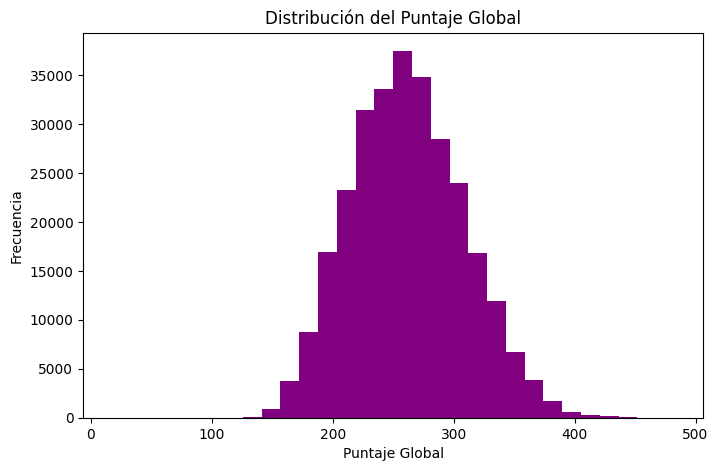

In [98]:
#histograma de la distribución del puntaje global 
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df_limpio["PUNT_GLOBAL"], bins=30, color="purple")
plt.title("Distribución del Puntaje Global")
plt.xlabel("Puntaje Global")
plt.ylabel("Frecuencia")
plt.show()

Revisando los municipios y el puntaje global

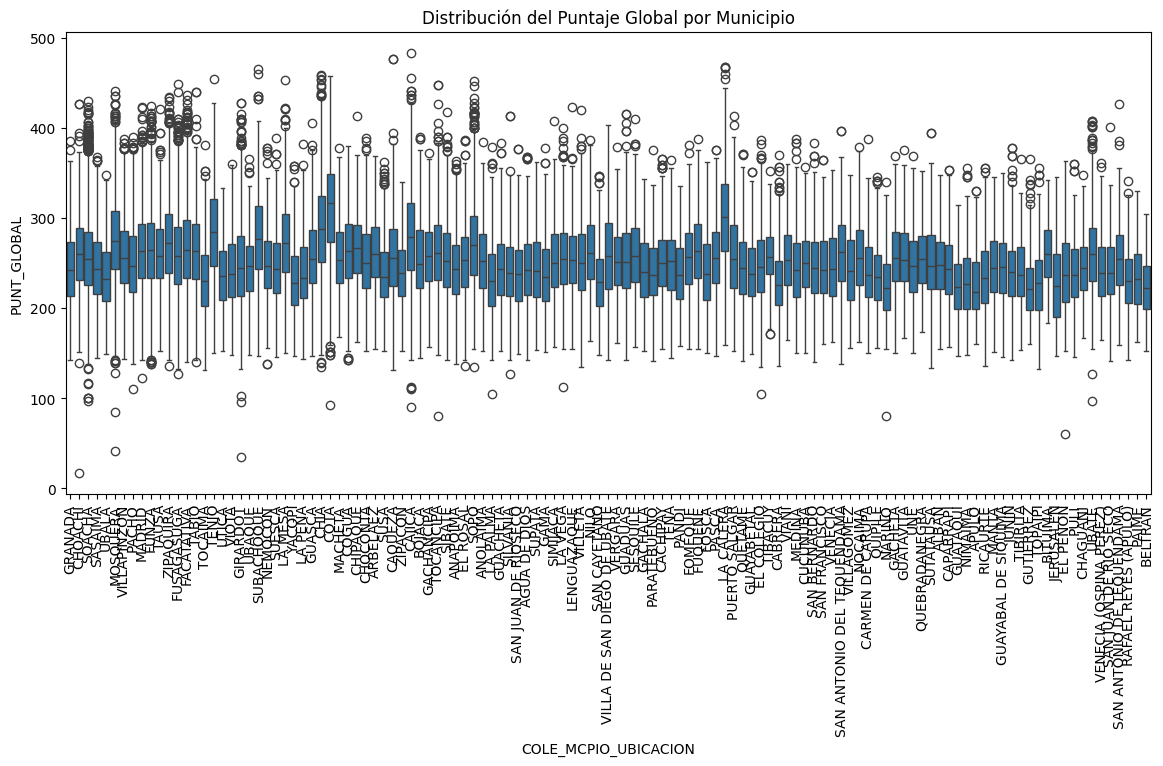

In [116]:
#puntaje global promedio por municipio en cundinamarca
df_limpio.groupby('COLE_MCPIO_UBICACION')['PUNT_GLOBAL'].mean().sort_values(ascending=False)

#box plot de los datos del puntaje global por municipio
plt.figure(figsize=(14,6))
sns.boxplot(x='COLE_MCPIO_UBICACION',
            y='PUNT_GLOBAL',
            data=df_limpio)

plt.xticks(rotation=90)
plt.title("Distribución del Puntaje Global por Municipio")
plt.show()

In [ ]:
#en cada municipio
#cuánto cambia el puntaje promedio entre tener y no tener internet

brecha_municipio = df_limpio.groupby(
    ['COLE_MCPIO_UBICACION','FAMI_TIENEINTERNET']
)['PUNT_GLOBAL'].mean().unstack()

brecha_municipio['Brecha'] = brecha_municipio[1] - brecha_municipio[0]

brecha_municipio.sort_values('Brecha', ascending=False).head(10)

FAMI_TIENEINTERNET,0,1,Brecha
COLE_MCPIO_UBICACION,,,
COTA,254.288612,314.519426,60.230815
LA CALERA,261.535959,306.432620,44.896661
CHIA,250.913268,291.568785,40.655517
CAJICA,247.942118,287.285897,39.343779
TENJO,253.796569,292.314862,38.518294
SUBACHOQUE,261.267470,292.934629,31.667159
VENECIA,236.253968,266.400000,30.146032
NARIÑO,215.709220,245.796610,30.087390
MOSQUERA,252.393265,279.883441,27.490176


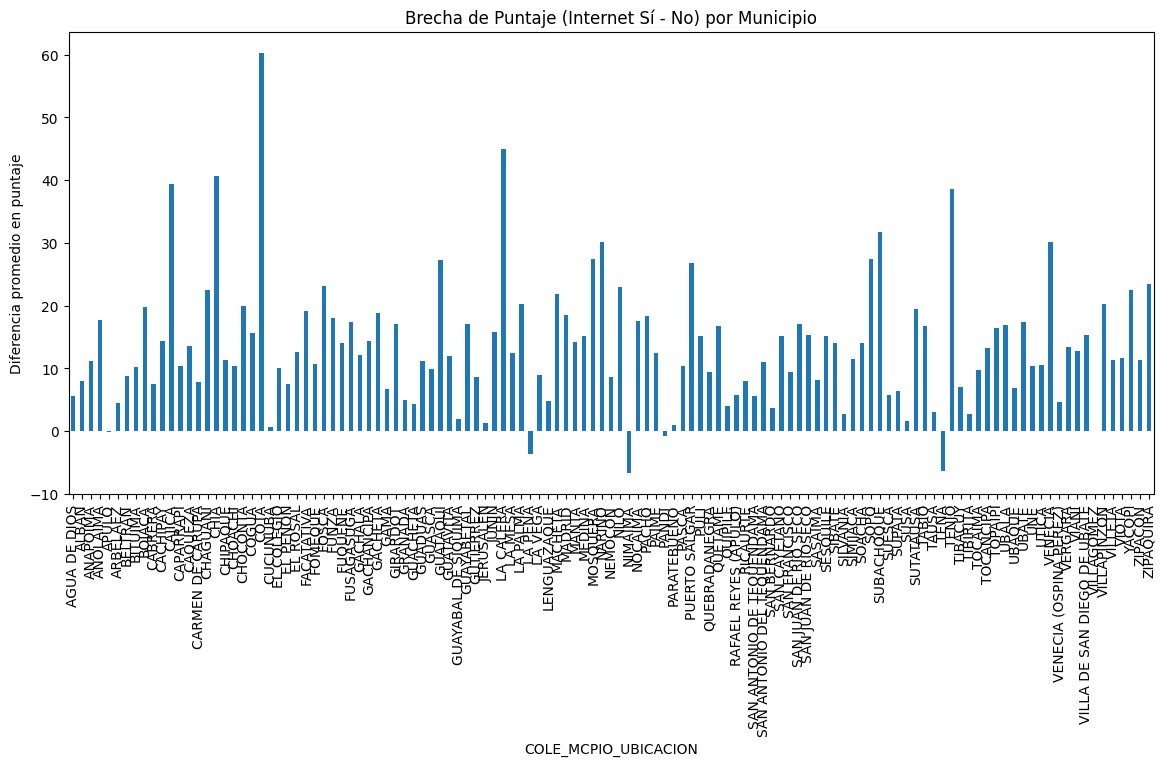

In [ ]:
#graficando la brecha 

brecha_municipio['Brecha'].plot(kind='bar', figsize=(14,6))
plt.title("Brecha de Puntaje (Internet Sí - No) por Municipio")
plt.ylabel("Diferencia promedio en puntaje")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#modelo de regresión para ver que tan significativo es tener 
#computador e internet en el puntaje global con una variable de control de estrato
import statsmodels.formula.api as smf

modelo = smf.ols(
    'PUNT_GLOBAL ~ FAMI_TIENECOMPUTADOR + FAMI_TIENEINTERNET + C(FAMI_ESTRATOVIVIENDA) ',
    data=df_limpio
).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     5852.
Date:                Tue, 24 Feb 2026   Prob (F-statistic):               0.00
Time:                        14:24:51   Log-Likelihood:            -1.4838e+06
No. Observations:              285577   AIC:                         2.968e+06
Df Residuals:                  285569   BIC:                         2.968e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [119]:
#agrupar para ver la media de cuando tiene computador 
df_limpio.groupby("FAMI_TIENECOMPUTADOR")["PUNT_GLOBAL"].mean()

FAMI_TIENECOMPUTADOR
0    244.295599
1    269.800602
Name: PUNT_GLOBAL, dtype: float64

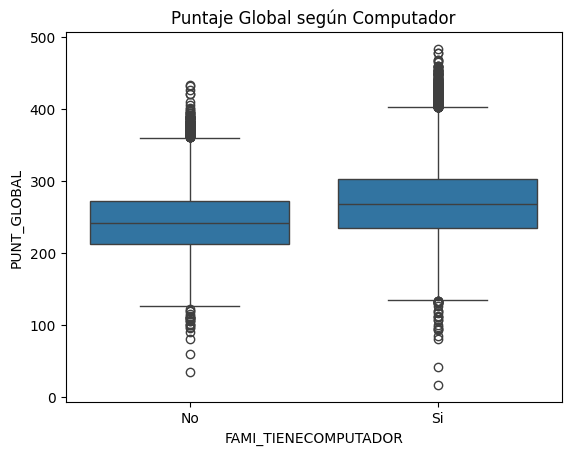

In [ ]:


plt.figure()
sns.boxplot(x="FAMI_TIENECOMPUTADOR", y="PUNT_GLOBAL", data=df)
plt.title("Puntaje Global según Computador")
plt.show()

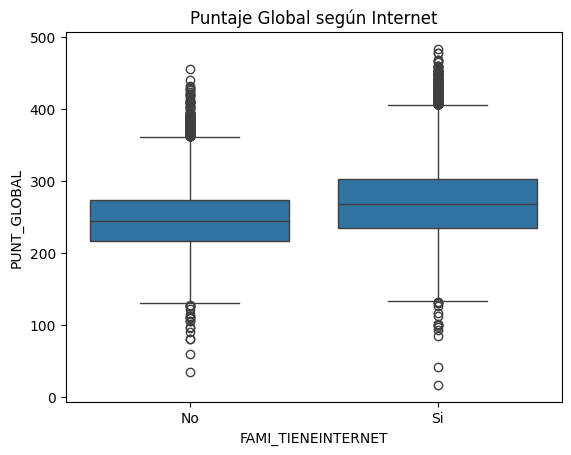

In [ ]:
plt.figure()
sns.boxplot(x="FAMI_TIENEINTERNET", y="PUNT_GLOBAL", data=df)
plt.title("Puntaje Global según Internet")
plt.show()

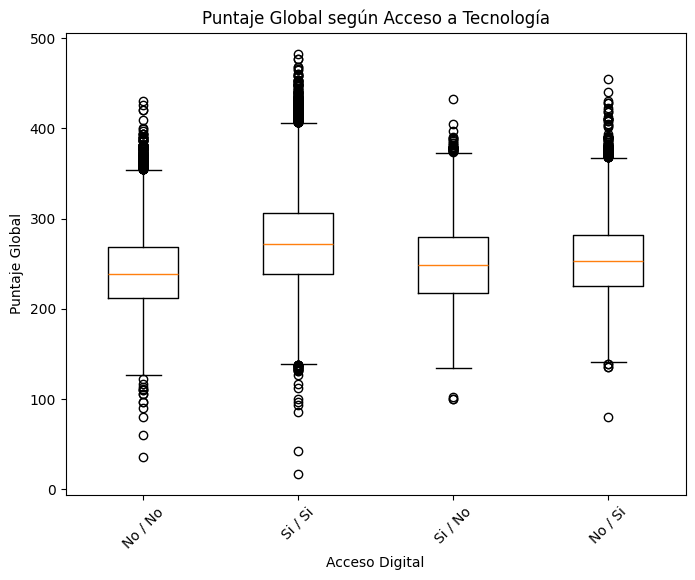

In [ ]:
#asegurarse de que no tenga nulos 
df_tecnologia = df.dropna(subset=["FAMI_TIENEINTERNET","FAMI_TIENECOMPUTADOR"])

#nueva columna juntando que si tienen internet la familia o si tienen computador
df_tecnologia["BRECHA_DIGITAL"] = (
    df_tecnologia["FAMI_TIENEINTERNET"] + " / " +
    df_tecnologia["FAMI_TIENECOMPUTADOR"]
)

#categorias
categorias = df_tecnologia["BRECHA_DIGITAL"].unique()

#array con los datos
datos = [
    df_tecnologia[df_tecnologia["BRECHA_DIGITAL"] == c]["PUNT_GLOBAL"]
    for c in categorias
]

#figura para la grafica
plt.figure(figsize=(8,6))
plt.boxplot(datos)

#etiqueta y titulos
plt.xticks(range(1, len(categorias)+1), categorias, rotation=45)
plt.title("Puntaje Global según Acceso a Tecnología")
plt.xlabel("Acceso Digital")
plt.ylabel("Puntaje Global")

plt.show()

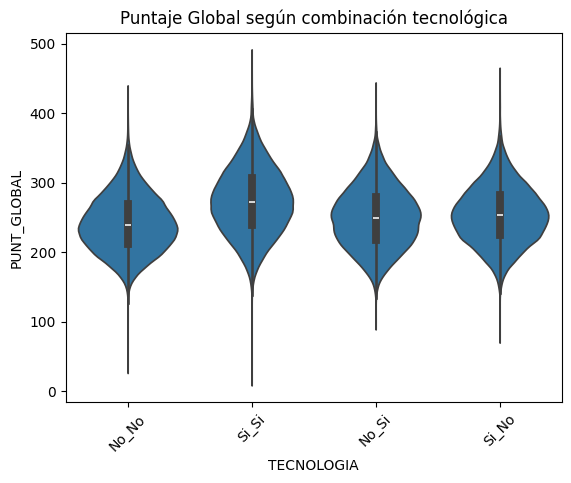

In [ ]:
#brecha tecnologica en diagramas de violin
df["TECNOLOGIA"] = df["FAMI_TIENECOMPUTADOR"] + "_" + df["FAMI_TIENEINTERNET"]

#figura, titulo y etiquetas
plt.figure()
sns.violinplot(x="TECNOLOGIA", y="PUNT_GLOBAL", data=df)
plt.xticks(rotation=45)
plt.title("Puntaje Global según combinación tecnológica")
plt.show()

In [ ]:
#combinación de la brecha tecnologica

df.groupby("FAMI_TIENECOMPUTADOR")["PUNT_GLOBAL"].mean()
df.groupby("FAMI_TIENEINTERNET")["PUNT_GLOBAL"].mean()
df.groupby("FAMI_ESTRATOVIVIENDA")["PUNT_GLOBAL"].mean()

df.groupby(["FAMI_TIENECOMPUTADOR", "FAMI_TIENEINTERNET"])["PUNT_GLOBAL"].mean()

FAMI_TIENECOMPUTADOR  FAMI_TIENEINTERNET
No                    No                    241.492312
                      Si                    249.900785
Si                    No                    254.105726
                      Si                    272.972299
Name: PUNT_GLOBAL, dtype: float64

In [ ]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Tratando de hacer graficas que combinen la variable de control , variables independientes y dependientes

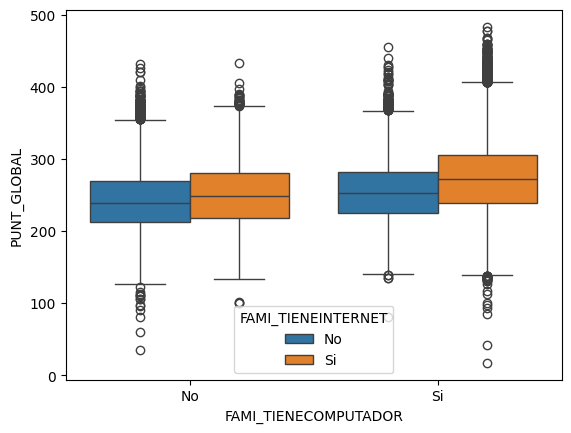

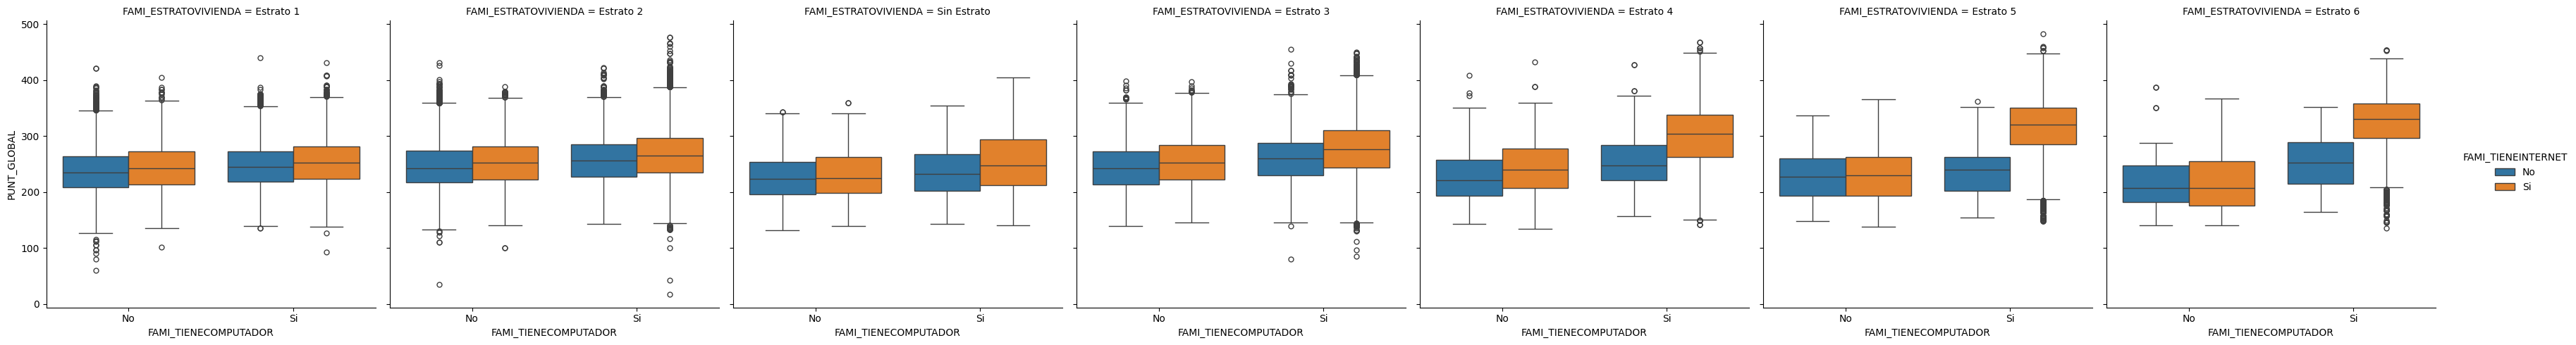

In [ ]:
sns.boxplot(
    x="FAMI_TIENECOMPUTADOR",
    y="PUNT_GLOBAL",
    hue="FAMI_TIENEINTERNET",
    data=df
)

sns.catplot(
    x="FAMI_TIENECOMPUTADOR",
    y="PUNT_GLOBAL",
    hue="FAMI_TIENEINTERNET",
    col="FAMI_ESTRATOVIVIENDA",
    kind="box",
    data=df
)

Modelo de regresión


In [ ]:
#seleccionar variables
df_modelo = df[['PUNT_GLOBAL', 
                'FAMI_TIENEINTERNET', 
                'FAMI_TIENECOMPUTADOR', 
                'FAMI_ESTRATOVIVIENDA']].copy()

#limpiar texto
df_modelo['FAMI_TIENEINTERNET'] = df_modelo['FAMI_TIENEINTERNET'].astype(str).str.strip().str.lower()
df_modelo['FAMI_TIENECOMPUTADOR'] = df_modelo['FAMI_TIENECOMPUTADOR'].astype(str).str.strip().str.lower()
df_modelo['FAMI_ESTRATOVIVIENDA'] = df_modelo['FAMI_ESTRATOVIVIENDA'].astype(str)

#recodificar internet y computador
df_modelo['FAMI_TIENEINTERNET'] = df_modelo['FAMI_TIENEINTERNET'].map({'sí':1, 'si':1, 'no':0})
df_modelo['FAMI_TIENECOMPUTADOR'] = df_modelo['FAMI_TIENECOMPUTADOR'].map({'sí':1, 'si':1, 'no':0})

#extraer número del estrato
df_modelo['FAMI_ESTRATOVIVIENDA'] = df_modelo['FAMI_ESTRATOVIVIENDA'].str.extract('(\d+)')

#convertir a numérico
df_modelo['FAMI_TIENEINTERNET'] = pd.to_numeric(df_modelo['FAMI_TIENEINTERNET'], errors='coerce')
df_modelo['FAMI_TIENECOMPUTADOR'] = pd.to_numeric(df_modelo['FAMI_TIENECOMPUTADOR'], errors='coerce')
df_modelo['FAMI_ESTRATOVIVIENDA'] = pd.to_numeric(df_modelo['FAMI_ESTRATOVIVIENDA'], errors='coerce')
df_modelo['PUNT_GLOBAL'] = pd.to_numeric(df_modelo['PUNT_GLOBAL'], errors='coerce')

#eliminar nulos finales
df_modelo = df_modelo.dropna()

#ahora sí convertir a int
df_modelo[['FAMI_TIENEINTERNET',
           'FAMI_TIENECOMPUTADOR',
           'FAMI_ESTRATOVIVIENDA']] = df_modelo[['FAMI_TIENEINTERNET',
                                                 'FAMI_TIENECOMPUTADOR',
                                                 'FAMI_ESTRATOVIVIENDA']].astype(int)

<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
C:\Users\danis\AppData\Local\Temp\ipykernel_24188\1465877498.py:17: SyntaxWarning: invalid escape sequence '\d'
  df_modelo['FAMI_ESTRATOVIVIENDA'] = df_modelo['FAMI_ESTRATOVIVIENDA'].str.extract('(\d+)')


In [ ]:
import statsmodels.api as sm

#definir el modelo
X = df_modelo[['FAMI_TIENECOMPUTADOR',
               'FAMI_TIENEINTERNET',
               'FAMI_ESTRATOVIVIENDA']]

y = df_modelo['PUNT_GLOBAL']

#intercepto
X = sm.add_constant(X)

modelo = sm.OLS(y, X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                 1.333e+04
Date:                Sun, 22 Feb 2026   Prob (F-statistic):               0.00
Time:                        17:11:27   Log-Likelihood:            -1.4843e+06
No. Observations:              285577   AIC:                         2.969e+06
Df Residuals:                  285573   BIC:                         2.969e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  222.0083 

Mapa de calor de las correlaciones

Número de filas después de limpiar: 0


c:\Users\danis\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\danis\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


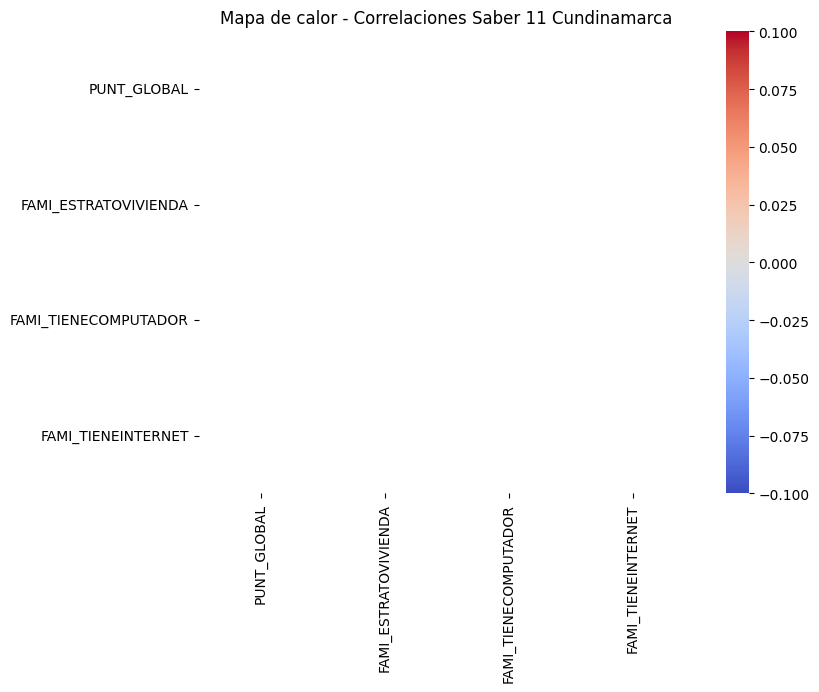

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columnas = [
    "PUNT_GLOBAL",
    "FAMI_ESTRATOVIVIENDA",
    "FAMI_TIENECOMPUTADOR",
    "FAMI_TIENEINTERNET"
]

df_heat = df[columnas].copy()

# Estrato numérico
df_heat["FAMI_ESTRATOVIVIENDA"] = pd.to_numeric(
    df_heat["FAMI_ESTRATOVIVIENDA"], errors="coerce"
)

# Normalizar texto
df_heat["FAMI_TIENECOMPUTADOR"] = df_heat["FAMI_TIENECOMPUTADOR"].astype(str).str.upper()
df_heat["FAMI_TIENEINTERNET"] = df_heat["FAMI_TIENEINTERNET"].astype(str).str.upper()

# Convertir a binario
df_heat["FAMI_TIENECOMPUTADOR"] = df_heat["FAMI_TIENECOMPUTADOR"].replace({
    "SI":1, "SÍ":1, "1":1,
    "NO":0, "2":0
})

df_heat["FAMI_TIENEINTERNET"] = df_heat["FAMI_TIENEINTERNET"].replace({
    "SI":1, "SÍ":1, "1":1,
    "NO":0, "2":0
})

# Eliminar nulos después de convertir
df_heat = df_heat.dropna()

print("Número de filas después de limpiar:", len(df_heat))

# Matriz de correlación
corr = df_heat.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor - Correlaciones Saber 11 Cundinamarca")
plt.show()

Filas antes de limpiar: 298977
Valores únicos computador:
<StringArray>
['No', 'Si', nan]
Length: 3, dtype: str
Valores únicos internet:
<StringArray>
['No', 'Si', nan]
Length: 3, dtype: str
Valores únicos estrato:
<StringArray>
[  'Estrato 1',   'Estrato 2', 'Sin Estrato',   'Estrato 3',   'Estrato 4',
           nan,   'Estrato 5',   'Estrato 6']
Length: 8, dtype: str
